# **TASK 2: IMAGE CLASSIFICATION FOR FOOD RECOGNITION**

### **Description:**

•	Develop an image classification model to recognize different types of food items from images.

### **Steps:**

1.	Data Collection: Collect a dataset of food images categorized into various classes.
2.	Data Preprocessing: Resize images, normalize pixel values, and split data into training and testing sets.
3.	Model Architecture: Choose a Convolutional Neural Network (CNN) architecture like VGG, ResNet, or MobileNet.
4.	Transfer Learning: Use a pre-trained model and fine-tune it for your specific food classification task.
5.	Model Training: Train the model on the preprocessed dataset.
6.	Model Evaluation: Evaluate the model's accuracy and other relevant metrics on the test dataset.
7.	Visualization: Visualize model predictions and explore misclassified images.

### **Tech Stack:**

•	Python
•	Deep Learning frameworks
•	Image processing libraries


# **1. Data Collection**

# **Dataset : food-101-tiny**

In [89]:
DATA_DIR = "/content/drive/MyDrive/Coding Raja/data/food-101-tiny"

In [90]:
class_names = [
    'apple_pie',
    'bibimbap',
    'cannoli',
    'edamame',
    'falafel',
    'french_toast',
    'ice_cream',
    'ramen',
    'sushi',
    'tiramisu'
]

In [91]:
import os

train_data_path = os.path.join(DATA_DIR, 'train')
train_split_count = {name:0 for name in class_names}

for name in train_split_count.keys():
    train_split_count[name] = len(os.listdir(os.path.join(train_data_path, name)))

print(train_split_count)

{'apple_pie': 150, 'bibimbap': 150, 'cannoli': 150, 'edamame': 150, 'falafel': 150, 'french_toast': 150, 'ice_cream': 150, 'ramen': 150, 'sushi': 150, 'tiramisu': 150}


[150, 150, 150, 150, 150, 150, 150, 150, 150, 150]
['apple_pie', 'bibimbap', 'cannoli', 'edamame', 'falafel', 'french_toast', 'ice_cream', 'ramen', 'sushi', 'tiramisu']


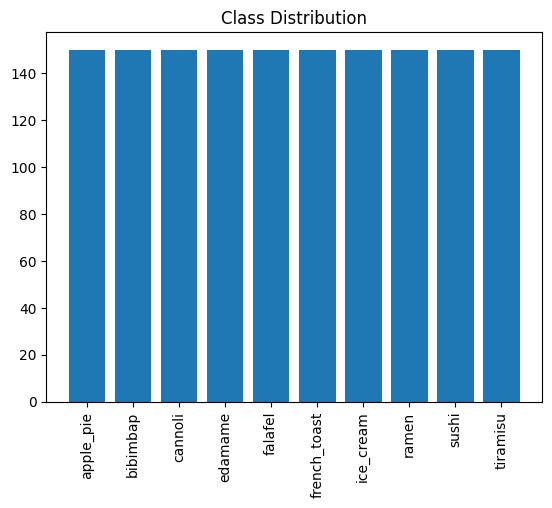

In [92]:
import matplotlib.pyplot as plt

value = list(train_split_count.values())
keys = list(train_split_count.keys())
print(value)
print(keys)

plt.bar(keys, value)
plt.title("Class Distribution")
plt.xticks(keys,rotation='vertical')
plt.show()

In [93]:
train_split_images_path = []

for name in class_names:
    list_files = os.listdir(os.path.join(train_data_path, name))
    list_files = [os.path.join(train_data_path, name, file) for file in list_files]
    train_split_images_path+=list_files


In [94]:
import numpy as np

rgb_mean = np.zeros(3)
print(rgb_mean)
rgb_std = np.zeros(3)
rgb_median = np.zeros(3)

[0. 0. 0.]


In [95]:
import cv2

for file in train_split_images_path:
    img = cv2.imread(file)
    image_size = img.shape[:2]

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255.0
    rgb_median += np.median(img, axis=(0,1))
    rgb_mean += np.mean(img, axis=(0,1))
    rgb_std += np.std(img, axis=(0,1))

In [96]:
train_rgb_median = rgb_median / len(train_split_images_path)
train_rgb_mean = rgb_mean / len(train_split_images_path)
train_rgb_std = rgb_std / len(train_split_images_path)
print(f'size: {image_size}')
print(f'median: {train_rgb_median}')
print(f'mean: {train_rgb_mean}')
print(f'std: {train_rgb_std}')

size: (512, 512)
median: [0.52068235 0.41877124 0.28893595]
mean: [0.51462304 0.43454864 0.33441313]
std: [0.24198696 0.24747032 0.23758201]


In [97]:
print(f'Original Median: {train_rgb_median} mean: {train_rgb_mean} std: {train_rgb_std}')

for size in [224, 384]:
    rgb_mean = np.zeros(3)
    rgb_std = np.zeros(3)
    rgb_median = np.zeros(3)
    for file in train_split_images_path:
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (size, size))
        img = img / 255.0
        rgb_median += np.median(img, axis=(0, 1))
        rgb_mean += np.mean(img, axis=(0, 1))
        rgb_std += np.std(img, axis=(0, 1))

    rgb_median /= len(train_split_images_path)
    rgb_mean /= len(train_split_images_path)
    rgb_std /= len(train_split_images_path)
    print(f'{size} Median: {rgb_median} mean: {rgb_mean} std: {rgb_std}')

Original Median: [0.52068235 0.41877124 0.28893595] mean: [0.51462304 0.43454864 0.33441313] std: [0.24198696 0.24747032 0.23758201]
224 Median: [0.52029542 0.41839869 0.28850719] mean: [0.51420346 0.43412702 0.33399528] std: [0.2408595  0.24633563 0.23637417]
384 Median: [0.5205451  0.41864052 0.28871111] mean: [0.51442681 0.43435301 0.33421855] std: [0.24099932 0.246478   0.23652802]


In [98]:
val_data_path = os.path.join(DATA_DIR, 'valid')
val_split_count = {name:0 for name in class_names}

for name in val_split_count.keys():
    val_split_count[name] = len(os.listdir(os.path.join(train_data_path, name)))

print(val_split_count)

{'apple_pie': 150, 'bibimbap': 150, 'cannoli': 150, 'edamame': 150, 'falafel': 150, 'french_toast': 150, 'ice_cream': 150, 'ramen': 150, 'sushi': 150, 'tiramisu': 150}


[150, 150, 150, 150, 150, 150, 150, 150, 150, 150]
['apple_pie', 'bibimbap', 'cannoli', 'edamame', 'falafel', 'french_toast', 'ice_cream', 'ramen', 'sushi', 'tiramisu']


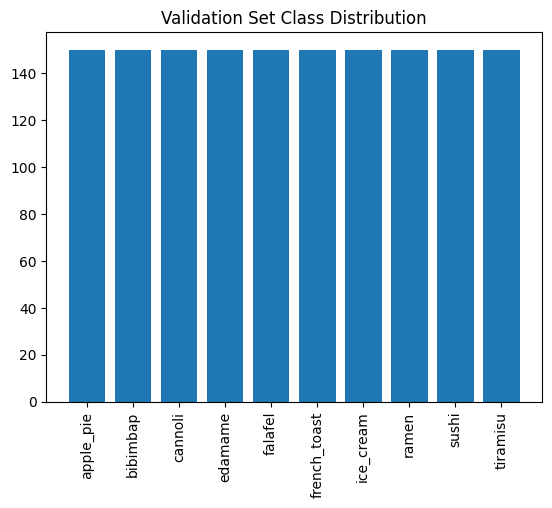

In [99]:
value = list(val_split_count.values())
keys = list(val_split_count.keys())
print(value)
print(keys)

plt.bar(keys, value)
plt.title("Validation Set Class Distribution")
plt.xticks(keys,rotation='vertical')
plt.show()

In [100]:
import random

rows = 10
cols = 4
fig, axs = plt.subplots(rows, cols, figsize = (25,100)) #
axs = axs.ravel().tolist() # flatten into 1d list

list_of_samples = random.choices(train_split_images_path, k=rows*cols)  # k = number of elements to be chosen
random.shuffle(train_split_images_path) # andomly shuffle the elements

for idx, file_path in enumerate(train_split_images_path):
    if idx >= rows * cols:
        break
    img = cv2.imread(file_path)
    img = cv2. cvtColor(img, cv2.COLOR_BGR2RGB)
    class_name = file_path.split('/')[-2]  # access the secod last element from the list = class name
    axs[idx].imshow(img)
    axs[idx].set_title(class_name, pad = 10)

plt.suptitle("Image from each class", y=1.05, fontsize=30)
plt.setp(axs, xticks=[],yticks=[])
plt.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

# **2. Data Preprocessing**

In [101]:
train_data_path = os.path.join(DATA_DIR, 'train')
train_split_images_path = []

for name in class_names:
    list_files = os.listdir(os.path.join(train_data_path,name))
    list_files = [os.path.join(train_data_path, name, file) for file in list_files]
    train_split_images_path += list_files

In [102]:
random.shuffle(train_split_images_path)
train_split_images_path = random.choices(train_split_images_path, k=20)

def visualize(image):
    shape = image.shape
    print(shape)
    if shape[-1] != 3:
        image = np.transpose(image, (1,2,0))
    plt.figure(figsize=(10,10))
    plt.imshow(image)

(512, 512, 3)


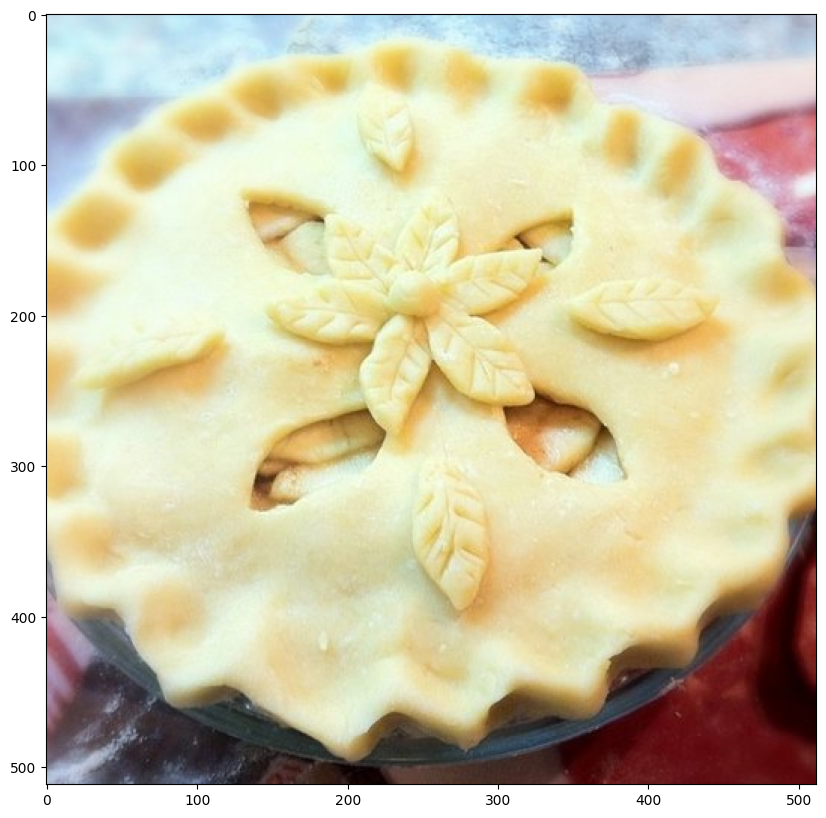

In [103]:
image = cv2.imread(train_split_images_path[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize(image)

(3, 512, 512)


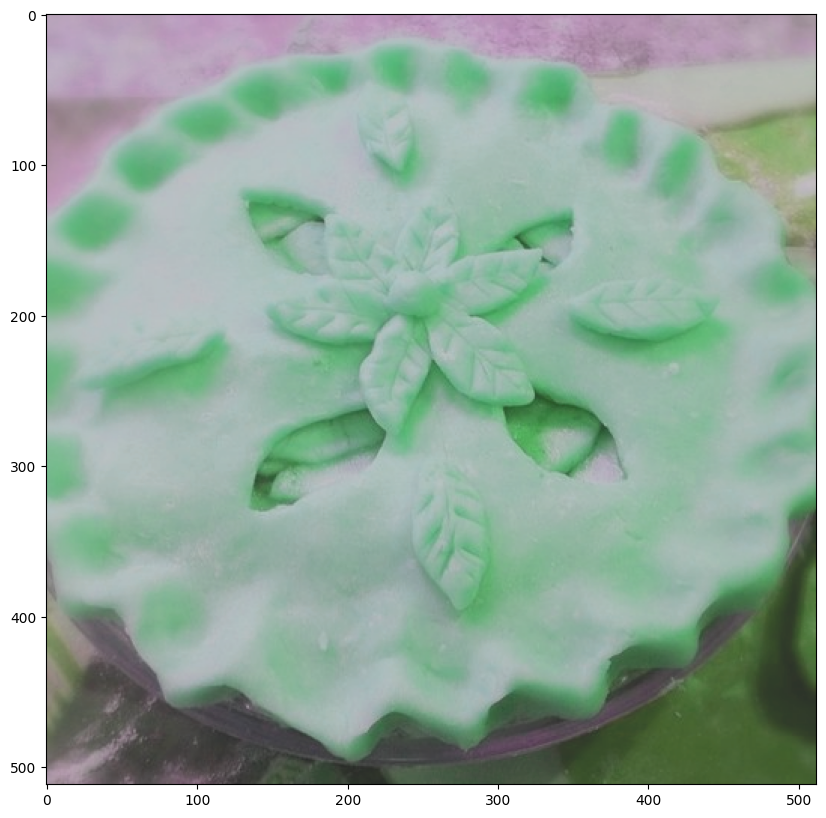

In [104]:
# transformation = transforms.ColorJitter(brightness=0.3, contrast = 0.5, saturation = 0.02, hue = 0.4)
from torchvision import transforms
import torch

transformation = transforms.ColorJitter(0.3, 0.5, 0.02, 0.4)
image = cv2.imread(train_split_images_path[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# print(image)
image_tf = torch.from_numpy(image).permute((2,0,1)) # converts a NumPy array into a PyTorch tensor, and then rearrange the dimensions of tensor
# print(image_tf)
image_tf = transformation(image_tf)
visualize(image_tf.numpy())

(3, 384, 384)


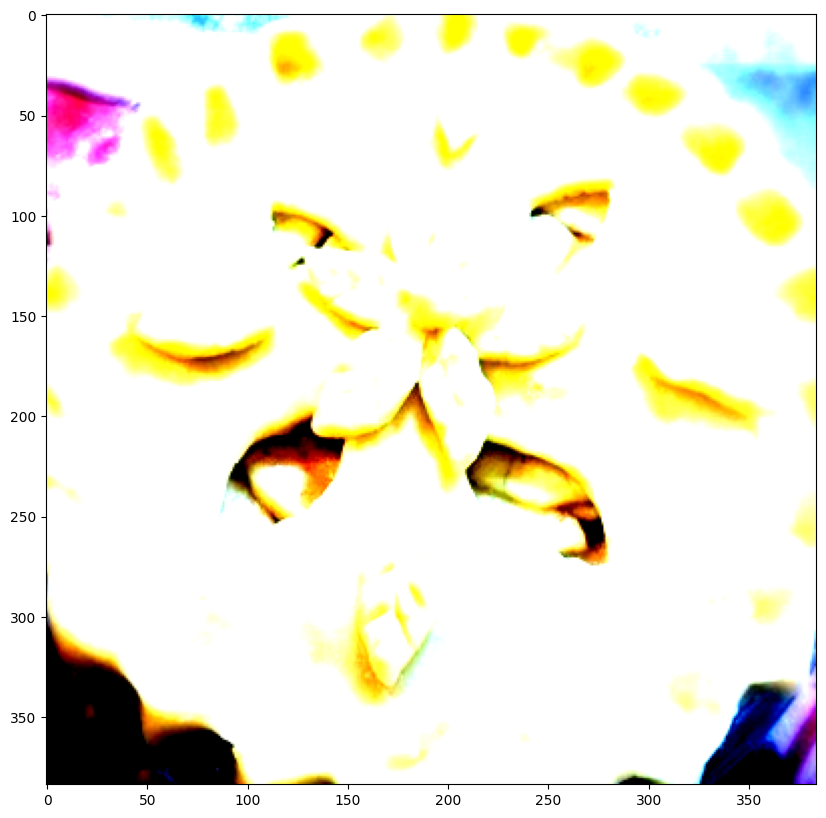

In [105]:
transformations = transforms.Compose([
    transforms.ToPILImage(),           # Convert a tensor or an ndarray to PIL Image
    transforms.RandomResizedCrop(384),
    transforms.RandomHorizontalFlip(), # Horizontally flip the given image randomly
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.51442681, 0.43435301, 0.33421855], std=[0.24099932, 0.246478, 0.23652802]) # Normalize a tensor image with mean and std. This transform does not support PIL image so it needed to change into tensor
])

image = cv2.imread(train_split_images_path[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_pt = transformations(image)
visualize(image_pt.numpy())

In [106]:
rows = 5
cols = 4
fig, axs = plt.subplots(rows, cols, figsize=(25,30))
axs = axs.ravel().tolist()

for idx, file_path in enumerate(train_split_images_path):
    image = cv2.imread(file_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = transformations(image).numpy()
    image = np.transpose(image, (1,2,0))
    class_name = file_path.split('/')[-2]
    axs[idx].imshow(image)
    axs[idx].set_title(class_name, pad = 10)

fig.suptitle("Image from each class", y=1.05, fontsize=30)
plt.setp(axs, xticks=[],yticks=[])
plt.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

# **3. Model Architecture**

**Resnet18**

In [107]:
import torch.nn as nn

class BuildingBlock(nn.Module):
    def __init__(self,
                in_channels,
                out_channels,
                stride = 1,
                identity_downsample = None):
        super(BuildingBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels,
                              out_channels,
                              kernel_size = 3,
                              stride = stride,
                              padding = 1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(out_channels,
                              out_channels,
                              kernel_size = 3,
                              stride = 1,
                              padding = 1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.identity_downsample = identity_downsample

    def forward(self, x):
        identity = x
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)
        if self.identity_downsample is not None:
            identity = self.identity_downsample(identity)
        x += identity
        x = self.relu(x)
        return x

In [108]:
class ResNet_18(nn.Module):
    def __init__(self, img_channels, num_classes):

        # Feature extraction in the beginning
        # Convolution and maxpool layer
        super(ResNet_18, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(img_channels,
                               64, kernel_size = 7,
                              stride = 2, padding=3)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size = 3,
                                   stride = 2,
                                   padding = 1)

        # ResNet-18 layers
        self.layer1 = self._make_layer(64, 64, stride = 1)
        self.layer2 = self._make_layer(64, 128, stride = 2)
        self.layer3 = self._make_layer(128, 256, stride = 2)
        self.layer4 = self._make_layer(256, 512, stride = 2)

        # Last layers
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, in_channels, out_channels, stride):
        identity_downsample = None
        if stride != 1:
            identity_downsample = self.identity_downsample(in_channels, out_channels)

        return nn.Sequential(
                    BuildingBlock(in_channels, out_channels, identity_downsample=identity_downsample, stride=stride),
                    BuildingBlock(out_channels, out_channels)
                    )

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        return x

    def identity_downsample(self, in_channels, out_channels):
        return nn.Sequential(
             nn.Conv2d(in_channels,
                       out_channels,
                       kernel_size = 3,
                       stride = 2,
                       padding = 1),
            nn.BatchNorm2d(out_channels)
        )

# **4. Model Training**

In [109]:
# For transforming the Food101 Dataset
train_trans = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

valid_trans = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

In [110]:
# Load the Food101 dataset

# Training Dataset
import torchvision.datasets as datasets

train_set = datasets.ImageFolder(
              root=DATA_DIR + r'/train',  # Creates dataset from train-images-idx3-ubyte
              transform=train_trans) # Downloads the dataset from internet and puts in root directory

# Testing Dataset
test_set = datasets.ImageFolder(
              root=DATA_DIR + r'/valid',
              transform=valid_trans)

In [111]:
from sklearn.model_selection import train_test_split

# Split the training data into train and validation sets
train_idx, val_idx = train_test_split(list(range(len(train_set))), test_size=0.25, random_state=0)
train_sampler = torch.utils.data.SubsetRandomSampler(train_idx)
val_sampler = torch.utils.data.SubsetRandomSampler(val_idx)

In [112]:
batch_size = 32

# torch.utils.data.DataLoader class = It represents a Python iterable over a dataset

# Load Training Dataset
train_loader = torch.utils.data.DataLoader(
                  dataset    = train_set, # dataset from which to load the data
                  batch_size = batch_size,       # how many samples per batch to load (default: 1)
                  sampler    = train_sampler)

# Load Training Dataset
val_loader = torch.utils.data.DataLoader(
                  dataset    = train_set, # dataset from which to load the data
                  batch_size = batch_size,       # how many samples per batch to load (default: 1)
                  sampler    = val_sampler)

# Load testing Dataset
test_loader = torch.utils.data.DataLoader(
                  dataset    = test_set, # dataset from which to load the data
                  batch_size = batch_size,      # how many samples per batch to load (default: 1)
                  shuffle    = True)

In [113]:
print('Total training batch number: {}'.format(len(train_loader)))
print('Total validation batch number: {}'.format(len(val_loader)))
print('Total testing batch number: {}'.format(len(test_loader)))

Total training batch number: 36
Total validation batch number: 12
Total testing batch number: 16


In [114]:
# Hyperparameters
num_classes = 10 # 101 food classes
epochs = 100
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
lr = 0.0001

In [115]:
import torch.optim as optim

model = ResNet_18(3, 10)
# import timm

# model = timm.create_model('vgg16', num_classes = 10, pretrained=True)
# model.load_state_dict(torch.load('VGG16-Food101Tiny.pt'))
model = model.to(device)

# Set up loss function
# LeNet-5 use cross-entropy loss
loss_function = nn.CrossEntropyLoss()

# Set up optimzation = SGD
# Momentum used for parameter update
optimizer = optim.Adam(model.parameters(), lr=lr)
# optimizer = torch.optim.SGD(model.parameters(), lr=lr, weight_decay = 0.0001, momentum = 0.9)
# lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, verbose=True)

In [ ]:
import wandb
import copy
from tqdm.notebook import tqdm

print("Training ResNet-18 with Food101Tiny Dataset")

# INIT
wandb.init(name = 'ResNet18-Food101Tiny-Adam',
           project = 'ResNet18-Food101Tiny')

# Log the model weight histograms (optional)
wandb.watch(model)
wandb.config.lr = lr

val_acc_history = []
best_model_wts = copy.deepcopy(model.state_dict())
best_acc = 0.0

for epoch in range(epochs):

    print('-' * 5)
    model.train()

    running_loss = 0.0
    correct = 0
    total = 0
    train_load_tqdm = tqdm(enumerate(train_loader), total = len(train_loader))

    for i, (images, labels) in train_load_tqdm:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)

        # compute loss
        loss = loss_function(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # accuracy
        _, pred = torch.max(outputs.data, 1) # Returns the maximum value of all elements in the input tensor, dim = 1
        total += labels.size(0)
        correct += (pred == labels).sum().item()

    # loss and accuracy for the complete epoch
    train_epoch_loss = running_loss / len(train_loader)
#     lr_scheduler.step(train_epoch_loss)
    train_epoch_acc = 5. * (correct /total)

    print('Epoch [{}/{}] | Train loss: {:.4f} | Train accuracy: {:.2f}%'.
        format(epoch + 1, epochs, train_epoch_loss, train_epoch_acc))

    # VALIDATION
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0
    val_load_tqdm = tqdm(enumerate(val_loader), total = len(val_loader))

    with torch.no_grad():
        for i, (images, labels) in val_load_tqdm:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)

            loss = loss_function(outputs, labels)
            running_loss = loss.item() * len(images)

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    valid_epoch_loss = running_loss/len(val_loader)
    valid_epoch_acc = 5 * (correct/total)

    # deep copy the model
    if valid_epoch_acc > best_acc:
        best_acc = valid_epoch_acc
        best_model_wts = copy.deepcopy(model.state_dict())
    val_acc_history.append(valid_epoch_acc)

    print('Validation Loss {:.4f}'.format(valid_epoch_loss))
    print('Validation Accuracy: {:.2f} %'.format(valid_epoch_acc))

  # Log the loss and accuracy values at the end of each epoch
    wandb.log({
      "Epoch": epoch,
      "Train Loss": train_epoch_loss,
      "Train Acc": train_epoch_acc,
      "Validation Loss": valid_epoch_loss,
      "Validation Acc": valid_epoch_acc})

print('Best val Acc: {:4f}'.format(best_acc))
print('Finished training!')

# load best model weights
model.load_state_dict(best_model_wts)

wandb.finish()

# **6. Model Evaluation**

In [122]:
model.eval()
correct = 0
total = 0
for inputs,labels in test_loader:
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total += inputs.size(0)
    correct += (predicted == labels).sum().item()
test_accuracy = 100 * correct / total
print('Test Accuracy: %.2f' % (test_accuracy))


Test Accuracy: 58.00


# **7. Visualization**

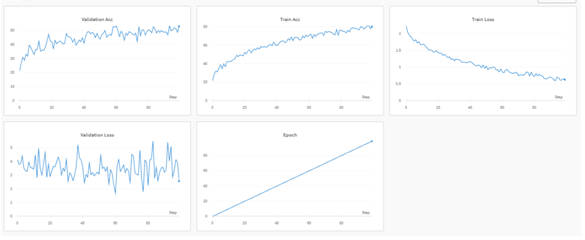

---

